<a href="https://colab.research.google.com/github/kumar-sendhi/courseraml/blob/master/Sentimentprojectv4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tweepy
!pip install textblob 
!pip install wordcloud

In [2]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
log = pd.read_csv("sample_data/Login.csv")

consumerkey=log['key'][0]
consumersecret=log['key'][1]
accesstoken=log['key'][2]
accesstokensecret=log['key'][3]

In [4]:
authenticate =tweepy.OAuthHandler(consumerkey,consumersecret)
authenticate.set_access_token(accesstoken,accesstokensecret)

api=tweepy.API(authenticate,wait_on_rate_limit=True)

In [5]:
import csv
csvFile = open('tweet.csv', 'a')
csvWriter = csv.writer(csvFile)


In [6]:
searchTerm = input("enter keyword/hashtag to be searched about : ")
noofsearch = int(input("Enter how many tweets to analyse : "))

post= api.search(q = searchTerm +" -filter:retweets", count = noofsearch, lang= "en", tweet_mode= "extended")
print("recent posts")
i=1
for tweet in post [0:10]:
    print(str(i) + ')' + tweet.full_text + '\n')
    i=i+1

KeyboardInterrupt: ignored

In [37]:
searchTerm = input("enter keyword/hashtag to be searched about : ")
noofsearch = int(input("Enter how many tweets to analyse : "))

searched_tweets = []
last_id = -1
while len(searched_tweets) < noofsearch:
    count = noofsearch - len(searched_tweets)
    try:
        new_tweets = api.search(q = searchTerm +" -filter:retweets", count = count, lang= "en", tweet_mode= "extended",  max_id=str(last_id - 1))
        if not new_tweets:
            break
        searched_tweets.extend(new_tweets)
        last_id = new_tweets[-1].id
    except tweepy.TweepError as e:
        # depending on TweepError.code, one may want to retry or wait
        # to keep things simple, we will give up on an error
        break

enter keyword/hashtag to be searched about : trump
Enter how many tweets to analyse : 100


In [ ]:
searched_tweets

[Status(_api=<tweepy.api.API object at 0x7f10f27bfac8>, _json={'created_at': 'Mon Jul 06 08:53:28 +0000 2020', 'id': 1280062294378991618, 'id_str': '1280062294378991618', 'full_text': '#Karnataka #BengaluruLockdown \n#KarnatakaCovidHorror \n\nAll interstate travelers must undergo 14 days home quarantine. No more institutional quarantine for #Maharashtra travelers too. \n@TOIBengaluru https://t.co/Pol6vcYDK0', 'truncated': False, 'display_text_range': [0, 197], 'entities': {'hashtags': [{'text': 'Karnataka', 'indices': [0, 10]}, {'text': 'BengaluruLockdown', 'indices': [11, 29]}, {'text': 'KarnatakaCovidHorror', 'indices': [31, 52]}, {'text': 'Maharashtra', 'indices': [155, 167]}], 'symbols': [], 'user_mentions': [{'screen_name': 'TOIBengaluru', 'name': 'TOI Bengaluru', 'id': 31058922, 'id_str': '31058922', 'indices': [184, 197]}], 'urls': [], 'media': [{'id': 1280062269259276288, 'id_str': '1280062269259276288', 'indices': [198, 221], 'media_url': 'http://pbs.twimg.com/media/EcOx2hGUYA

header_list = ["Tweets"]
df = pd.read_csv('tweet.csv',names=header_list)

In [38]:
df=pd.DataFrame([tweet.full_text for tweet in searched_tweets], columns=['tweets'])
df['id'] = np.array([tweet.id for tweet in searched_tweets])
df['date'] = np.array([tweet.created_at for tweet in searched_tweets])
df['source'] = np.array([tweet.source for tweet in searched_tweets])
df['likes'] = np.array([tweet.favorite_count for tweet in searched_tweets])
df['retweets'] = np.array([tweet.retweet_count for tweet in searched_tweets])



df.to_csv('tweets_exported.csv', encoding='utf-8')
df.head()
df.shape
    



(100, 6)

In [39]:
#clean data
def clean(text):
    text=re.sub(r'@[A-Za-z0-9]+', '', text) #remove tags
    text=re.sub(r'# ','', text) #remove hashtags
    text=re.sub(r'RT[\s]+','', text) #remove retweets
    text=re.sub(r'https?:\/\/\S','', text) #remove hyperlinks
    
    return text

punctuation = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
def remove_punct(text):
    text  = "".join([char for char in text if char not in punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

df['tweets']= df['tweets'].apply(clean)
df['tweets'] = df['tweets'].apply(lambda x: remove_punct(x))

df.head(10)

df.to_csv('tweets_exported_cleaned.csv', encoding='utf-8')
    

In [10]:
!pip install HTMLParser


  Created wheel for HTMLParser: filename=HTMLParser-0.0.2-cp36-none-any.whl size=5983 sha256=10d4b4c937d881f4a2285e746ff03046a7eeba82df68d84af089d56ed250c0fc
  Stored in directory: /root/.cache/pip/wheels/e0/a1/d9/1655169e4c4354903ca3adc524b2cfd60d44767144c1faef62
Successfully built HTMLParser
ERROR: Could not find a version that satisfies the requirement markupbase (from versions: none)
ERROR: No matching distribution found for markupbase


In [40]:
from html.parser import HTMLParser
#import markupbase
html_parser = HTMLParser()
df['tweets'] = html_parser.unescape(df['tweets'])
df.to_csv('tweets_exported_cleaned_htmlparsing.csv', encoding='utf-8')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: The unescape method is deprecated and will be removed in 3.5, use html.unescape() instead.
  after removing the cwd from sys.path.


In [41]:
#defining subjectivity

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#defining polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#new columns 

df['Subjectivity'] = df['tweets'].apply(getSubjectivity)
df['Polarity'] = df['tweets'].apply(getPolarity)

df.head()


,tweets,id,date,source,likes,retweets,Subjectivity,Polarity
0,A Trump for President ad deceptively suggests that presumptive Democratic presidential nominee Joe Biden supports a campaign to “defund the police” But Biden has said explicitly that he doesn’t\n\n coEhMZMcsNe,1280111631494774784,2020-07-06 12:09:30,Twitter Web App,0,0,0.000000,0.000000
1,Yesthats our President Trump,1280111631352070144,2020-07-06 12:09:30,Twitter for Android,0,0,0.000000,0.000000
2,Trump,1280111631028989952,2020-07-06 12:09:30,Twitter for iPhone,0,0,0.000000,0.000000
3,Hire more people Trump has them half staffed and it makes Trump mad at Steve MNUCHIN 😂,1280111629124984832,2020-07-06 12:09:30,Twitter for Android,0,0,0.555556,-0.097222
4,Short sighted but Trump needs the constant accolades and praise and attention hes a narcissist,1280111627170459648,2020-07-06 12:09:29,Twitter for Android,0,0,0.316667,0.000000


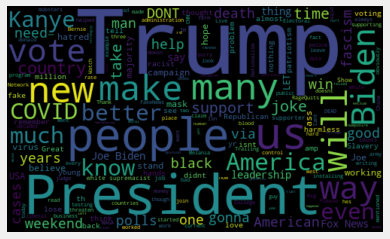

In [42]:
#Plot the word cloud

allWords = ' '.join([twts for twts in df['tweets']])
wordCloud = WordCloud(width= 500, height = 300, random_state= 25, max_font_size= 120).generate(allWords)
plt.imshow(wordCloud, interpolation= "bilinear")
plt.axis('off')
plt.show();



In [44]:
#function to create positive, negative, neutral

def getAnalysis(score):
    if score< 0 :
        return 'Negative'
    elif score == 0 :
         return 'Neutral'
    else :
         return 'Positive'
        
df['Analysis']= df['Polarity'].apply(getAnalysis)
df.to_csv('tweets_exported_cleaned_with_Classification.csv', encoding='utf-8')
df.head()
        
       

,tweets,id,date,source,likes,retweets,Subjectivity,Polarity,Analysis
0,A Trump for President ad deceptively suggests that presumptive Democratic presidential nominee Joe Biden supports a campaign to “defund the police” But Biden has said explicitly that he doesn’t\n\n coEhMZMcsNe,1280111631494774784,2020-07-06 12:09:30,Twitter Web App,0,0,0.000000,0.000000,Neutral
1,Yesthats our President Trump,1280111631352070144,2020-07-06 12:09:30,Twitter for Android,0,0,0.000000,0.000000,Neutral
2,Trump,1280111631028989952,2020-07-06 12:09:30,Twitter for iPhone,0,0,0.000000,0.000000,Neutral
3,Hire more people Trump has them half staffed and it makes Trump mad at Steve MNUCHIN 😂,1280111629124984832,2020-07-06 12:09:30,Twitter for Android,0,0,0.555556,-0.097222,Negative
4,Short sighted but Trump needs the constant accolades and praise and attention hes a narcissist,1280111627170459648,2020-07-06 12:09:29,Twitter for Android,0,0,0.316667,0.000000,Neutral


Cleaning 
Remove Punctuation
Tokenization
Remove Stop Words
Stemming/Lemmatizing

In [45]:
pd.set_option('display.max_colwidth',280)
df['tweets'].head()

0     A Trump for President ad deceptively suggests that presumptive Democratic presidential nominee Joe Biden supports a campaign to “defund the police” But Biden has said explicitly that he doesn’t\n\n coEhMZMcsNe
1                                                                                                                                                                                          Yesthats our President Trump
2                                                                                                                                                                                                                Trump 
3                                                                                                                              Hire more people  Trump has them half staffed  and it makes Trump mad at Steve MNUCHIN 😂
4                                                                                                                        Short sighted b

In [46]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [51]:
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text
  
df['Tweet_punct'] = df['tweets'].apply(lambda x: remove_punct(x))
df.to_csv('tweets_exported_removed_punct.csv', encoding='utf-8')
df.head(10)


,tweets,id,date,source,likes,retweets,Subjectivity,Polarity,Analysis,Tweet_punct
0,A Trump for President ad deceptively suggests that presumptive Democratic presidential nominee Joe Biden supports a campaign to “defund the police” But Biden has said explicitly that he doesn’t\n\n coEhMZMcsNe,1280111631494774784,2020-07-06 12:09:30,Twitter Web App,0,0,0.000000,0.000000,Neutral,A Trump for President ad deceptively suggests that presumptive Democratic presidential nominee Joe Biden supports a campaign to “defund the police” But Biden has said explicitly that he doesn’t\n\n coEhMZMcsNe
1,Yesthats our President Trump,1280111631352070144,2020-07-06 12:09:30,Twitter for Android,0,0,0.000000,0.000000,Neutral,Yesthats our President Trump
2,Trump,1280111631028989952,2020-07-06 12:09:30,Twitter for iPhone,0,0,0.000000,0.000000,Neutral,Trump
3,Hire more people Trump has them half staffed and it makes Trump mad at Steve MNUCHIN 😂,1280111629124984832,2020-07-06 12:09:30,Twitter for Android,0,0,0.555556,-0.097222,Negative,Hire more people Trump has them half staffed and it makes Trump mad at Steve MNUCHIN 😂
4,Short sighted but Trump needs the constant accolades and praise and attention hes a narcissist,1280111627170459648,2020-07-06 12:09:29,Twitter for Android,0,0,0.316667,0.000000,Neutral,Short sighted but Trump needs the constant accolades and praise and attention hes a narcissist
5,The only example Trump can set is a bad example— what not to do,1280111627073961984,2020-07-06 12:09:29,Twitter for iPhone,0,0,0.833333,-0.350000,Negative,The only example Trump can set is a bad example— what not to do
6,what are the polls name trump polls,1280111626595774464,2020-07-06 12:09:29,Twitter for iPhone,0,0,0.000000,0.000000,Neutral,what are the polls name trump polls
7,Trump has worked with mobsters for many decades Before he started laundering money for the Russian mob he worked closely with NY mobsters\ncoXRzmSVNEa,1280111626021150720,2020-07-06 12:09:29,Twitter Web App,0,0,0.250000,0.250000,Positive,Trump has worked with mobsters for many decades Before he started laundering money for the Russian mob he worked closely with NY mobsters\ncoXRzmSVNEa
8,So this is a possible futureTrump unleashes the ignorance fear and hatred that have been fueling white supremacist fantasies for years The police and many of the army join them White Catholics join themremember Ruanda Where will the good white people take their stand covPpDxBvt,1280111625211719681,2020-07-06 12:09:29,Twitter for Android,0,0,0.350000,0.200000,Positive,So this is a possible futureTrump unleashes the ignorance fear and hatred that have been fueling white supremacist fantasies for years The police and many of the army join them White Catholics join themremember Ruanda Where will the good white people take their stand covPpDxBvt
9,Unblankinbelievable So unnecessary Trump is taking Live Free or Die too far TrumpRallyNH,1280111623970095106,2020-07-06 12:09:29,Twitter for iPhone,0,0,0.800000,0.059091,Positive,Unblankinbelievable So unnecessary Trump is taking Live Free or Die too far TrumpRallyNH


Tokenization

In [53]:
import re

def tokenize(text):
  tokens = re.split('\W+',text)
  return tokens

df['tweet_clean_tokenized'] = df['Tweet_punct'].apply(lambda x:tokenize(x.lower()))
df['tweet_clean_tokenized'].head(5)
#df['Tweet_punct'].head(5)


0    [, a, trump, for, president, ad, deceptively, suggests, that, presumptive, democratic, presidential, nominee, joe, biden, supports, a, campaign, to, defund, the, police, but, biden, has, said, explicitly, that, he, doesn, t, coehmzmcsne]
1                                                                                                                                                                                                              [, yesthats, our, president, trump]
2                                                                                                                                                                                                                                        [trump, ]
3                                                                                                                                        [, hire, more, people, trump, has, them, half, staffed, and, it, makes, trump, mad, at, steve, mnuchin, ]
4                           

No Stop Words

In [28]:
import nltk
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

stopwords[0:10]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [54]:
def remove_stopwords(txt_tokenized):
  txt_clean = [word for word in txt_tokenized if word not in stopwords]
  return txt_clean

df['tweet_clean_nostopwords'] = df['tweet_clean_tokenized'].apply(lambda x:remove_stopwords(x))
df['tweet_clean_nostopwords'].head(5)

0    [, trump, president, ad, deceptively, suggests, presumptive, democratic, presidential, nominee, joe, biden, supports, campaign, defund, police, biden, said, explicitly, coehmzmcsne]
1                                                                                                                                                           [, yesthats, president, trump]
2                                                                                                                                                                                [trump, ]
3                                                                                                              [, hire, people, trump, half, staffed, makes, trump, mad, steve, mnuchin, ]
4                                                                                                [, short, sighted, trump, needs, constant, accolades, praise, attention, hes, narcissist]
Name: tweet_clean_nostopwords, dtype: object

In [56]:
def merge_text(text):
    text  = " ".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text
  
df['tweet_ready'] = df['tweet_clean_nostopwords'].apply(lambda x: merge_text(x))
df.to_csv('tweets_exported_ready.csv', encoding='utf-8')
df.head(10)

,tweets,id,date,source,likes,retweets,Subjectivity,Polarity,Analysis,Tweet_punct,tweet_clean_tokenized,tweet_clean_nostopwords,tweet_ready
0,A Trump for President ad deceptively suggests that presumptive Democratic presidential nominee Joe Biden supports a campaign to “defund the police” But Biden has said explicitly that he doesn’t\n\n coEhMZMcsNe,1280111631494774784,2020-07-06 12:09:30,Twitter Web App,0,0,0.000000,0.000000,Neutral,A Trump for President ad deceptively suggests that presumptive Democratic presidential nominee Joe Biden supports a campaign to “defund the police” But Biden has said explicitly that he doesn’t\n\n coEhMZMcsNe,"[, a, trump, for, president, ad, deceptively, suggests, that, presumptive, democratic, presidential, nominee, joe, biden, supports, a, campaign, to, defund, the, police, but, biden, has, said, explicitly, that, he, doesn, t, coehmzmcsne]","[, trump, president, ad, deceptively, suggests, presumptive, democratic, presidential, nominee, joe, biden, supports, campaign, defund, police, biden, said, explicitly, coehmzmcsne]",trump president ad deceptively suggests presumptive democratic presidential nominee joe biden supports campaign defund police biden said explicitly coehmzmcsne
1,Yesthats our President Trump,1280111631352070144,2020-07-06 12:09:30,Twitter for Android,0,0,0.000000,0.000000,Neutral,Yesthats our President Trump,"[, yesthats, our, president, trump]","[, yesthats, president, trump]",yesthats president trump
2,Trump,1280111631028989952,2020-07-06 12:09:30,Twitter for iPhone,0,0,0.000000,0.000000,Neutral,Trump,"[trump, ]","[trump, ]",trump
3,Hire more people Trump has them half staffed and it makes Trump mad at Steve MNUCHIN 😂,1280111629124984832,2020-07-06 12:09:30,Twitter for Android,0,0,0.555556,-0.097222,Negative,Hire more people Trump has them half staffed and it makes Trump mad at Steve MNUCHIN 😂,"[, hire, more, people, trump, has, them, half, staffed, and, it, makes, trump, mad, at, steve, mnuchin, ]","[, hire, people, trump, half, staffed, makes, trump, mad, steve, mnuchin, ]",hire people trump half staffed makes trump mad steve mnuchin
4,Short sighted but Trump needs the constant accolades and praise and attention hes a narcissist,1280111627170459648,2020-07-06 12:09:29,Twitter for Android,0,0,0.316667,0.000000,Neutral,Short sighted but Trump needs the constant accolades and praise and attention hes a narcissist,"[, short, sighted, but, trump, needs, the, constant, accolades, and, praise, and, attention, hes, a, narcissist]","[, short, sighted, trump, needs, constant, accolades, praise, attention, hes, narcissist]",short sighted trump needs constant accolades praise attention hes narcissist
5,The only example Trump can set is a bad example— what not to do,1280111627073961984,2020-07-06 12:09:29,Twitter for iPhone,0,0,0.833333,-0.350000,Negative,The only example Trump can set is a bad example— what not to do,"[the, only, example, trump, can, set, is, a, bad, example, what, not, to, do, ]","[example, trump, set, bad, example, ]",example trump set bad example
6,what are the polls name trump polls,1280111626595774464,2020-07-06 12:09:29,Twitter for iPhone,0,0,0.000000,0.000000,Neutral,what are the polls name trump polls,"[, what, are, the, polls, name, trump, polls]","[, polls, name, trump, polls]",polls name trump polls
7,Trump has worked with mobsters for many decades Before he started laundering money for the Russian mob he worked closely with NY mobsters\ncoXRzmSVNEa,1280111626021150720,2020-07-06 12:09:29,Twitter Web App,0,0,0.250000,0.250000,Positive,Trump has worked with mobsters for many decades Before he started laundering money for the Russian mob he worked closely with NY mobsters\ncoXRzmSVNEa,"[, trump, has, worked, with, mobsters, for, many, decades, before, he, started, laundering, money, for, the, russian, mob, he, worked, closely, with, ny, mobsters, coxrzmsvnea]","[, trump, worked, mobsters, many, decades, started, laundering, money, russian, mob, worked, closel

Stemming

In [33]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
dir(ps)
print(ps.stem('university'))
print(ps.stem('universities'))
print(ps.stem('universe'))

univers
univers
univers


In [34]:
df.dtypes

tweets                             object
id                                  int64
date                       datetime64[ns]
source                             object
likes                               int64
retweets                            int64
Subjectivity                      float64
Polarity                          float64
Analysis                           object
Tweet_punct                        object
tweet_clean_tokenized              object
tweet_clean_nostopwords            object
dtype: object

In [57]:
df.head()

,tweets,id,date,source,likes,retweets,Subjectivity,Polarity,Analysis,Tweet_punct,tweet_clean_tokenized,tweet_clean_nostopwords,tweet_ready
0,A Trump for President ad deceptively suggests that presumptive Democratic presidential nominee Joe Biden supports a campaign to “defund the police” But Biden has said explicitly that he doesn’t\n\n coEhMZMcsNe,1280111631494774784,2020-07-06 12:09:30,Twitter Web App,0,0,0.000000,0.000000,Neutral,A Trump for President ad deceptively suggests that presumptive Democratic presidential nominee Joe Biden supports a campaign to “defund the police” But Biden has said explicitly that he doesn’t\n\n coEhMZMcsNe,"[, a, trump, for, president, ad, deceptively, suggests, that, presumptive, democratic, presidential, nominee, joe, biden, supports, a, campaign, to, defund, the, police, but, biden, has, said, explicitly, that, he, doesn, t, coehmzmcsne]","[, trump, president, ad, deceptively, suggests, presumptive, democratic, presidential, nominee, joe, biden, supports, campaign, defund, police, biden, said, explicitly, coehmzmcsne]",trump president ad deceptively suggests presumptive democratic presidential nominee joe biden supports campaign defund police biden said explicitly coehmzmcsne
1,Yesthats our President Trump,1280111631352070144,2020-07-06 12:09:30,Twitter for Android,0,0,0.000000,0.000000,Neutral,Yesthats our President Trump,"[, yesthats, our, president, trump]","[, yesthats, president, trump]",yesthats president trump
2,Trump,1280111631028989952,2020-07-06 12:09:30,Twitter for iPhone,0,0,0.000000,0.000000,Neutral,Trump,"[trump, ]","[trump, ]",trump
3,Hire more people Trump has them half staffed and it makes Trump mad at Steve MNUCHIN 😂,1280111629124984832,2020-07-06 12:09:30,Twitter for Android,0,0,0.555556,-0.097222,Negative,Hire more people Trump has them half staffed and it makes Trump mad at Steve MNUCHIN 😂,"[, hire, more, people, trump, has, them, half, staffed, and, it, makes, trump, mad, at, steve, mnuchin, ]","[, hire, people, trump, half, staffed, makes, trump, mad, steve, mnuchin, ]",hire people trump half staffed makes trump mad steve mnuchin
4,Short sighted but Trump needs the constant accolades and praise and attention hes a narcissist,1280111627170459648,2020-07-06 12:09:29,Twitter for Android,0,0,0.316667,0.000000,Neutral,Short sighted but Trump needs the constant accolades and praise and attention hes a narcissist,"[, short, sighted, but, trump, needs, the, constant, accolades, and, praise, and, attention, hes, a, narcissist]","[, short, sighted, trump, needs, constant, accolades, praise, attention, hes, narcissist]",short sighted trump needs constant accolades praise attention hes narcissist


In [59]:
#Using the machine learning concepts : SVM model
print(df['tweet_ready'].shape)

(100,)


In [60]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

k = cv.fit(df['tweet_ready'])
print(k.vocabulary_)
print(cv.get_feature_names())


{'trump': 736, 'president': 539, 'ad': 7, 'deceptively': 173, 'suggests': 666, 'presumptive': 542, 'democratic': 182, 'presidential': 540, 'nominee': 479, 'joe': 364, 'biden': 60, 'supports': 672, 'campaign': 77, 'defund': 180, 'police': 525, 'said': 597, 'explicitly': 231, 'coehmzmcsne': 108, 'yesthats': 819, 'hire': 319, 'people': 510, 'half': 292, 'staffed': 647, 'makes': 424, 'mad': 419, 'steve': 658, 'mnuchin': 444, 'short': 617, 'sighted': 621, 'needs': 469, 'constant': 132, 'accolades': 1, 'praise': 535, 'attention': 36, 'hes': 314, 'narcissist': 461, 'example': 230, 'set': 612, 'bad': 43, 'polls': 527, 'name': 459, 'worked': 801, 'mobsters': 446, 'many': 429, 'decades': 172, 'started': 652, 'laundering': 387, 'money': 448, 'russian': 596, 'mob': 445, 'closely': 100, 'ny': 484, 'coxrzmsvnea': 156, 'possible': 532, 'futuretrump': 266, 'unleashes': 755, 'ignorance': 334, 'fear': 250, 'hatred': 304, 'fueling': 264, 'white': 791, 'supremacist': 674, 'fantasies': 241, 'years': 817, '

In [61]:
k = cv.transform(df['tweets'])
print(k.shape)
print(k.toarray())
dfcv = pd.DataFrame(k.toarray(), columns = cv.get_feature_names())
print(dfcv)

(100, 831)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
    absolutely  accolades  across  actions  ...  yrs  zanderrose  zee  zey
0            0          0       0        0  ...    0           0    0    0
1            0          0       0        0  ...    0           0    0    0
2            0          0       0        0  ...    0           0    0    0
3            0          0       0        0  ...    0           0    0    0
4            0          1       0        0  ...    0           0    0    0
..         ...        ...     ...      ...  ...  ...         ...  ...  ...
95           0          0       0        0  ...    0           0    0    0
96           0          0       0        0  ...    0           0    0    0
97           0          0       0        0  ...    0           0    0    0
98           0          0       0        0  ...    1           0    0    0
99           0          0       0        0  

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv = TfidfVectorizer()

l = tfidfv.fit(df['tweet_ready'])
print(l.vocabulary_)
print(tfidfv.get_feature_names())

{'trump': 736, 'president': 539, 'ad': 7, 'deceptively': 173, 'suggests': 666, 'presumptive': 542, 'democratic': 182, 'presidential': 540, 'nominee': 479, 'joe': 364, 'biden': 60, 'supports': 672, 'campaign': 77, 'defund': 180, 'police': 525, 'said': 597, 'explicitly': 231, 'coehmzmcsne': 108, 'yesthats': 819, 'hire': 319, 'people': 510, 'half': 292, 'staffed': 647, 'makes': 424, 'mad': 419, 'steve': 658, 'mnuchin': 444, 'short': 617, 'sighted': 621, 'needs': 469, 'constant': 132, 'accolades': 1, 'praise': 535, 'attention': 36, 'hes': 314, 'narcissist': 461, 'example': 230, 'set': 612, 'bad': 43, 'polls': 527, 'name': 459, 'worked': 801, 'mobsters': 446, 'many': 429, 'decades': 172, 'started': 652, 'laundering': 387, 'money': 448, 'russian': 596, 'mob': 445, 'closely': 100, 'ny': 484, 'coxrzmsvnea': 156, 'possible': 532, 'futuretrump': 266, 'unleashes': 755, 'ignorance': 334, 'fear': 250, 'hatred': 304, 'fueling': 264, 'white': 791, 'supremacist': 674, 'fantasies': 241, 'years': 817, '

In [63]:
l = tfidfv.transform(df['tweets'])
print(l.shape)
print(l.toarray())
print(l)
dftfidv = pd.DataFrame(l.toarray(), columns = tfidfv.get_feature_names())
dftfidv.to_csv('dataset.csv', encoding='utf-8')  
#dftfidv['Analysis']=df['Analysis']
print(dftfidv)

(100, 831)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
  (0, 736)	0.0572722873541147
  (0, 672)	0.24775594050023184
  (0, 666)	0.24775594050023184
  (0, 597)	0.22734616126415333
  (0, 542)	0.24775594050023184
  (0, 540)	0.24775594050023184
  (0, 539)	0.13185138427450344
  (0, 525)	0.22734616126415333
  (0, 479)	0.24775594050023184
  (0, 364)	0.19245541320608664
  (0, 231)	0.24775594050023184
  (0, 182)	0.24775594050023184
  (0, 180)	0.24775594050023184
  (0, 173)	0.24775594050023184
  (0, 108)	0.24775594050023184
  (0, 77)	0.21286519244216515
  (0, 60)	0.34409126794001627
  (0, 7)	0.24775594050023184
  (1, 819)	0.8649486378540796
  (1, 736)	0.1999451025622636
  (1, 539)	0.46031055803200743
  (2, 736)	1.0
  (3, 736)	0.1694999225658603
  (3, 658)	0.3666224510151689
  (3, 647)	0.3666224510151689
  :	:
  (98, 297)	0.18835169564528592
  (98, 267)	0.18835169564528592
  (98, 181)	0.

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( dftfidv, df['Analysis'], test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (80, 831) (80,)
Test set: (20, 831) (20,)


In [65]:
import time
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn import metrics
# Perform classification with SVM, kernel=linear
classifier_linear = svm.SVC(kernel='linear')
t0 = time.time()
classifier_linear.fit(X_train, y_train)
t1 = time.time()


In [66]:
prediction_linear = classifier_linear.predict(X_test)
prediction_linear[0:5]

array(['Neutral', 'Neutral', 'Neutral', 'Neutral', 'Positive'],
      dtype=object)

In [67]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, prediction_linear))

DecisionTrees's Accuracy:  0.6


In [68]:
print(y_test +" |"+prediction_linear)

20      Neutral |Neutral
10      Neutral |Neutral
96     Negative |Neutral
16      Neutral |Neutral
63    Positive |Positive
24     Positive |Neutral
53      Neutral |Neutral
97     Positive |Neutral
41     Neutral |Positive
47      Neutral |Neutral
43     Positive |Neutral
2       Neutral |Neutral
95     Positive |Neutral
26      Neutral |Neutral
13     Negative |Neutral
37      Neutral |Neutral
14    Positive |Positive
29    Positive |Positive
35      Neutral |Neutral
54    Positive |Negative
Name: Analysis, dtype: object


In [ ]:
#Using the machine learning concepts : Naive Bayes Theorem

In [69]:
!pip install nltk

In [70]:
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import naive_bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
#vectorizer

stopset= set(stopwords.words('english'))
vectorizer = TfidfVectorizer(use_idf=True, strip_accents = 'ascii', stop_words= stopset)

y=df['Analysis']
X=vectorizer.fit_transform(df.tweets)



nbtfidv = pd.DataFrame(X.toarray(), columns = vectorizer.get_feature_names())

#dftfidv['Analysis']=df['Analysis']
print(nbtfidv)

      000   01  01bgslc0rc   02  ...  zz7kv9anhv  zzhulmj9gx  zzpjjxeein  zzxwstfwcq
0     0.0  0.0         0.0  0.0  ...         0.0         0.0         0.0         0.0
1     0.0  0.0         0.0  0.0  ...         0.0         0.0         0.0         0.0
2     0.0  0.0         0.0  0.0  ...         0.0         0.0         0.0         0.0
3     0.0  0.0         0.0  0.0  ...         0.0         0.0         0.0         0.0
4     0.0  0.0         0.0  0.0  ...         0.0         0.0         0.0         0.0
...   ...  ...         ...  ...  ...         ...         ...         ...         ...
2995  0.0  0.0         0.0  0.0  ...         0.0         0.0         0.0         0.0
2996  0.0  0.0         0.0  0.0  ...         0.0         0.0         0.0         0.0
2997  0.0  0.0         0.0  0.0  ...         0.0         0.0         0.0         0.0
2998  0.0  0.0         0.0  0.0  ...         0.0         0.0         0.0         0.0
2999  0.0  0.0         0.0  0.0  ...         0.0         0.0     

In [ ]:
print(y.shape)
print(X.shape)


(3000,)
(3000, 8879)


In [72]:
#test train split data
#X_train, X_test, y_train, y_test = train_test_split( dftfidv, df['Analysis'], test_size=0.2, random_state=4)
X_train, X_test, y_train, y_test = train_test_split(dftfidv,df['Analysis'],test_size=0.2,random_state=42)

In [73]:
#train naive bayes classifier

naive_bayes = MultinomialNB()
naive_bayes.fit(X_train,y_train)
MultinomialNB()
#print(naives_bayes.predict(X[2:3]))

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [74]:
prediction_naive_bayes = naive_bayes.predict(X_test)
prediction_naive_bayes[0:5]

array(['Neutral', 'Neutral', 'Neutral', 'Positive', 'Neutral'],
      dtype='<U8')

In [75]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, prediction_naive_bayes))

DecisionTrees's Accuracy:  0.5


In [76]:
print(y_test +" |"+prediction_naive_bayes)

83      Neutral |Neutral
53      Neutral |Neutral
70      Neutral |Neutral
45     Neutral |Positive
44     Positive |Neutral
39     Positive |Neutral
22     Negative |Neutral
80    Positive |Positive
10      Neutral |Neutral
0       Neutral |Neutral
18     Positive |Neutral
30      Neutral |Neutral
73     Neutral |Positive
33     Positive |Neutral
90      Neutral |Neutral
4       Neutral |Neutral
76     Negative |Neutral
77      Neutral |Neutral
12     Negative |Neutral
31    Negative |Positive
Name: Analysis, dtype: object


In [ ]:
#positive tweets

print("positive tweets :")
j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0,sortedDF.shape[0]):
    if(sortedDF['Analysis'][i] == 'Positive'):
        print(str(j) + ')' + sortedDF['tweets'][i]) 
        print()
        j=j+1

positive tweets :
1) sir you are surgeon by profession as per your twitter profile please check what kind of blood is running in ur/bjp body if it was indian you would have preferred to evict china than wasting your precious time in fighting with rahul gandhi n congress is bjp afraid of rahul gandhi?

2) I really sometimes feel Rahul Gandhi is like a shadow of Modi wherever Modi goes Rahul Gandhi follows him and this image proved me right

3)PM Modi has the second toughest job in India, Rahul Gandhi’s sign language interpreter has the first. Lifted from here .co/ADdcyPD0GG

4)  Congress must answer really 😂😂
Why not you demand resignation of Rahul Gandhi from India PM post .

5)_01 _Modi_Bhakt _ But why congress is keen to know the armh deployment whereabouts and more over what agreement did rahul gandhi your leader signed with china. mullaji

6)_ Good Job Nizami... once old #pidis tire out, there will be race to become fav pet of Rahul Gandhi.

You surely have seen future and working 

In [ ]:
#negative tweets


print("negative tweets : ")
j=1
sortedDF = df.sort_values(by=['Polarity'], ascending='False')
for i in range(0,sortedDF.shape[0]):
    if(sortedDF['Analysis'][i] == 'Negative'):
        print(str(j) + ')' + sortedDF['tweets'][i]) 
        print()
        j=j+1

negative tweets : 
1)Rauf Khan ( Rahul Gandhi ) say Sorry to Army and Nation. .co/hlzj2VL2VO

2) The most pathetic leader india has ever had shame on you rahul gandhi for using your own party workers to spread the false and fake narrative provoking enemies to take the benefit from your remarks.
India needs new opposition. You have became blind while hating modi and BJP govt.

3)FACT CHECK: Rahul Gandhi passes off Congress functionaries as ordinary
 .co/wHNYQ6ji48

4) ya absolutely no doubt🤣🤣
i applaud him for his knowledge base and orating skill,
i m still searching a leader frm opposition who can take him on fact, bt none, gaurabh vallabh rose and sank, and den none, 
...
anyway rahul gandhi still the leader in comefy🤣

5)     I dont know what kind of people they are who support useless person like Rahul Gandhi. He is a son of  Late RAJIV Gandhi that sit. He is nothing.

6)  #FactCheck :  passes off #Congress functionaries as ordinary #Ladakhis to slam Prime Minister  

The Truth.

#A

In [ ]:
#neutral tweets


print("Neutral tweets :")

j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0,sortedDF.shape[0]):
    if(sortedDF['Analysis'][i] == 'Neutral'):
        print(str(j) + ')' + sortedDF['tweets'][i]) 
        print()
        j=j+1

Neutral tweets :
1) _IN Even intelligent people in Congress are infected with a moron virus called Rahul Gandhi.

2) Thats just Rahul Gandhi accompanying the PM to Leh

3) Rahul Gandhi accompanied the PM to Leh

4) Tumh Jaise logo ko sharm nhi atti bilkul BHI😂😂😂
Nxt time try to demand resignation of Rahul Gandhi from PM post of India

5) Bhaiya But no one is watching and commenting on the video, why that woman is beaten?
Forget Rahul Gandhi, chk the video and have some sympathy with that woman..
🙏🙏🙏🙏

6)_rathee You and Rahul Gandhi 🤦‍♀️

7) grow up! 
.co/fyMTbzQGza

8) I nominate this person for Rahul Gandhi Award for 2020.

9)Please for once just go and search on Google ' Rahul Gandhi or Roll Vinci' 
#hypocritesVadraCong

10) Option            =    Result 
Reservations = Rahul Gandhi
Merit                =  Narendra Modi
Let the public decide.

11) from today Its my only goal to educate you in twitter. and explain you why you are a traitor and you must learn how to respect India and s

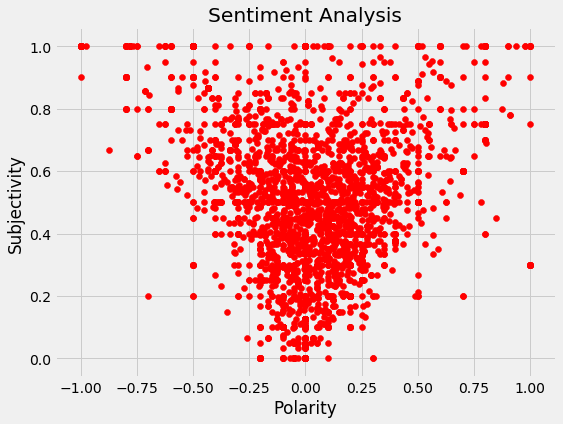

In [ ]:
#PLot the polarity
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
    plt.scatter(df['Polarity'][i],df['Subjectivity'][i], color= 'Red')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()
    

In [ ]:
#percentage of tweets

ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['tweets']
p =round (ptweets.shape[0] / df.shape[0] * 100, 1 )
print("positive tweets percentage : " + str(p))


ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['tweets']
n= round (ntweets.shape[0] / df.shape[0] * 100, 1 )
print("negative tweets percentage : " + str(n))

netweets = df[df.Analysis == 'Neutral']
netweets = netweets['tweets']
ne= round (netweets.shape[0] / df.shape[0] * 100, 1 )
print("neutral tweets percentage : " + str(ne))

positive tweets percentage : 33.6
negative tweets percentage : 30.2
neutral tweets percentage : 36.2


In [ ]:
#value counts 

df['Analysis'].value_counts()

Neutral     1809
Positive    1680
Negative    1511
Name: Analysis, dtype: int64

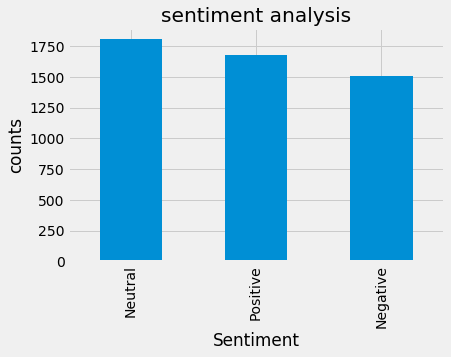

In [ ]:
#plot the graph

plt.title('sentiment analysis')
plt.xlabel('Sentiment')
plt.ylabel('counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()

How people are reacting on Rahul Gandhi by analyzing 5000 Tweets : 


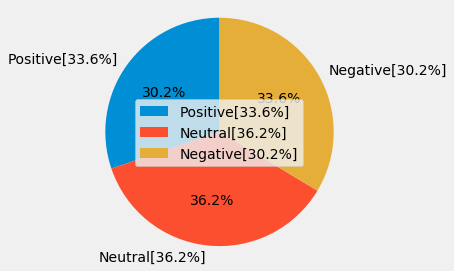

In [ ]:
import matplotlib.pyplot as plt

print("How people are reacting on " + searchTerm + " by analyzing " + str(noofsearch) + " Tweets : ")

labels=[r'Positive['+str(p)+'%]',r'Neutral['+str(ne)+'%]', r'Negative['+str(n)+'%]']
sizes = [n, ne, p]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
         startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(loc="center")
plt.tight_layout()
plt.show()


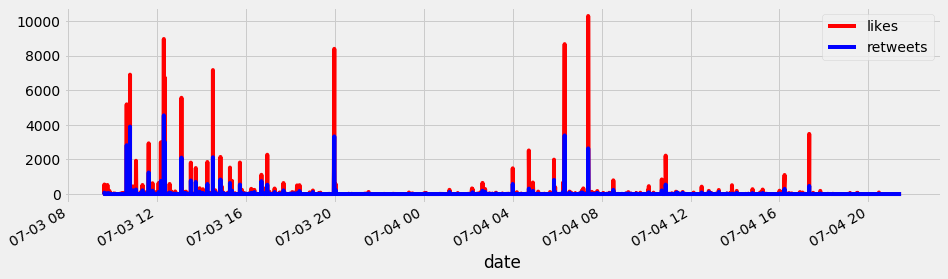

In [ ]:
time_likes = pd.Series(data=df['likes'].values, index=df['date'])
time_likes.plot(figsize=(16,4), label= "likes", legend= True, color = 'r')
time_retweets = pd.Series(data=df['retweets'].values, index=df['date'])
time_retweets.plot(figsize=(14,4), label= "retweets", legend= True, color = 'b')
plt.show()